<a href="https://colab.research.google.com/github/bramantio5/Machine_Learning_Portfolio/blob/main/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORT PACKAGES##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##DATA OVERVIEW##

In [ ]:
data_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
data_test = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
data_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##HANDLING MISSING & DUPLICATE VALUE##

In [ ]:
data_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

There are no Duplicate & Missing Value

##EDA##

In [ ]:
data_train['total_rooms']=np.log(data_train['total_rooms']+1)
data_train['total_bedrooms']=np.log(data_train['total_bedrooms']+1)
data_train['population']=np.log(data_train['population']+1)
data_train['households']=np.log(data_train['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

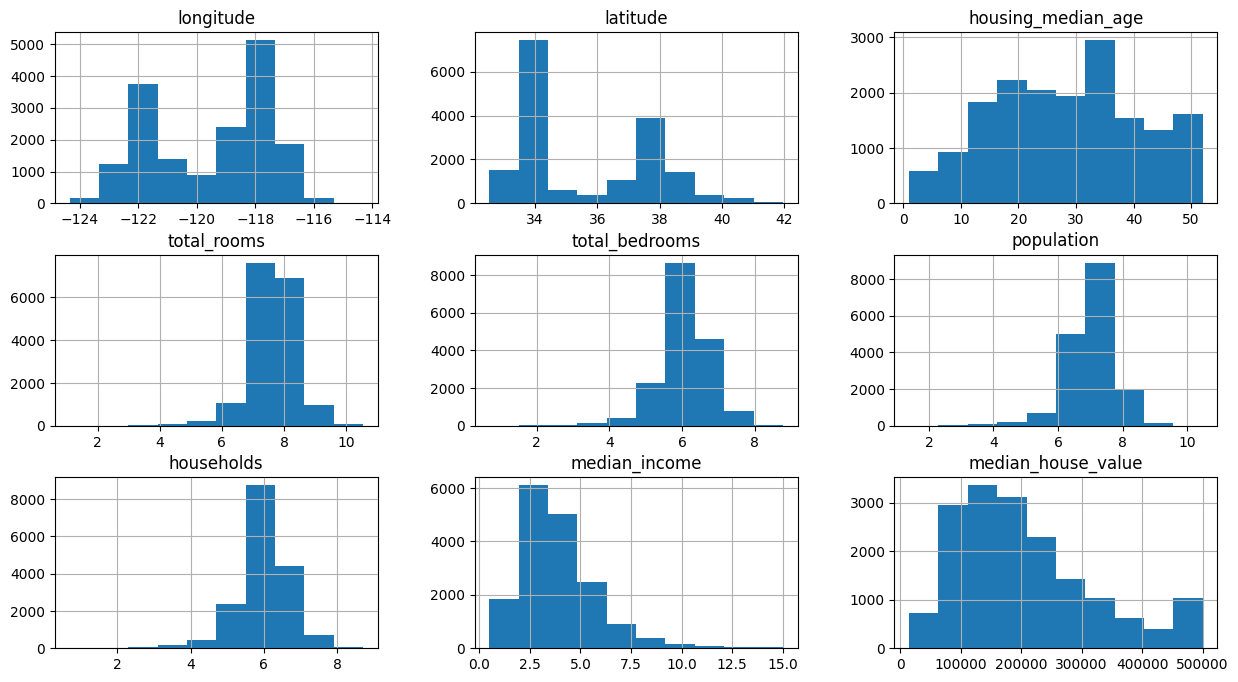

In [ ]:
data_train.hist(figsize= (15,8))

<Axes: >

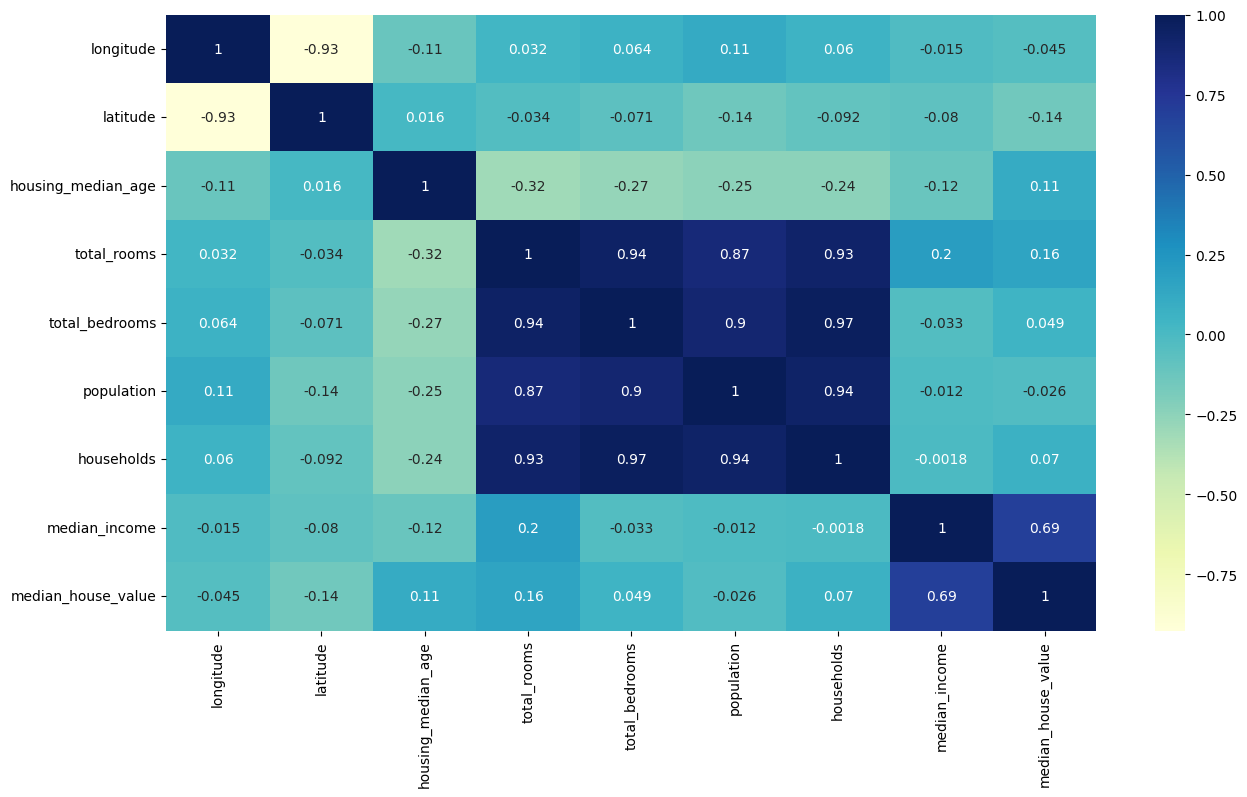

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data_train.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

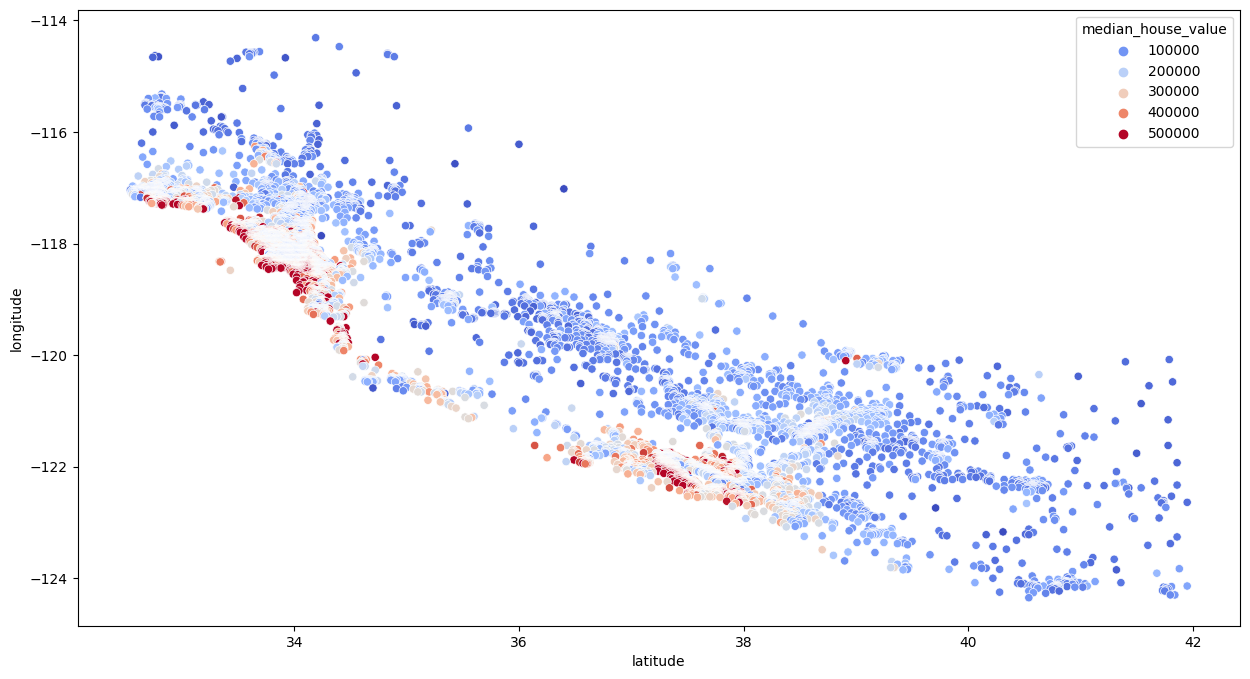

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude', data=data_train, hue='median_house_value', palette='coolwarm')

##Feature Engineering##

In [ ]:
data_train['bedroom_ratio'] = data_train['total_bedrooms'] /data_train['total_rooms']
data_train['household_rooms'] = data_train['total_rooms'] / data_train['households']

In [ ]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms
0,-114.31,34.19,15.0,8.632841,7.157735,6.923629,6.159095,1.4936,66900.0,0.829129,1.401641
1,-114.47,34.40,19.0,8.942592,7.550661,7.029973,6.139885,1.8200,80100.0,0.844348,1.456476
2,-114.56,33.69,17.0,6.580639,5.164786,5.811141,4.770685,1.6509,85700.0,0.784846,1.379391
3,-114.57,33.64,14.0,7.314553,5.823046,6.246107,5.424950,3.1917,73400.0,0.796090,1.348317
4,-114.57,33.57,20.0,7.282761,5.789960,6.437752,5.572154,1.9250,65500.0,0.795023,1.306992


<Axes: >

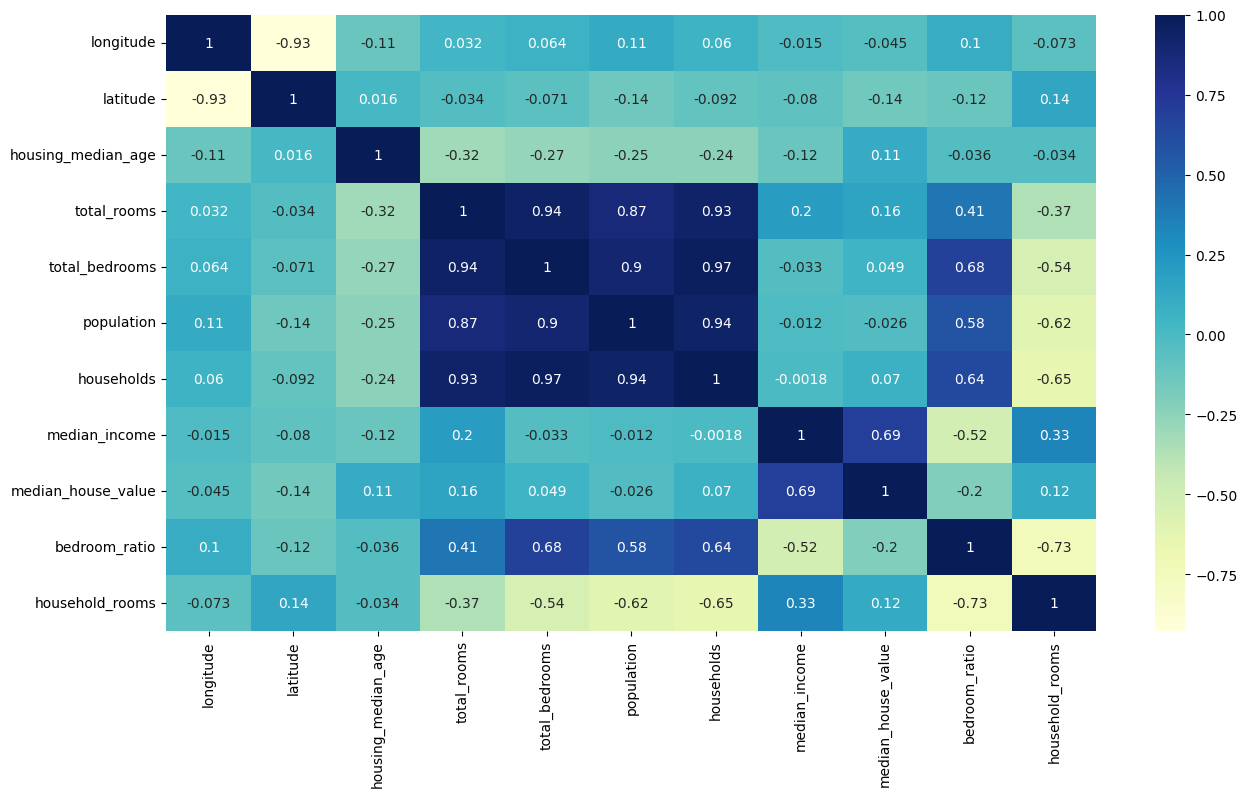

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data_train.corr(), annot=True, cmap='YlGnBu')

##Modelling (Linear Regression)##

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = data_train.drop(['median_house_value'], axis=1), data_train['median_house_value']
x_train_s = scaler.fit_transform(x_train)

In [ ]:
reg1 = LinearRegression()
reg1.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg2 = LinearRegression()
reg2.fit(x_train_s,y_train)

LinearRegression()

In [ ]:
data_test['total_rooms']=np.log(data_test['total_rooms'] + 1)
data_test['total_bedrooms']=np.log(data_test['total_bedrooms'] + 1)
data_test['population']=np.log(data_test['population'] + 1)
data_test['households']=np.log(data_test['households'] + 1)


data_test['bedroom_ratio'] = data_train['total_bedrooms'] /data_train['total_rooms']
data_test['household_rooms'] = data_train['total_rooms'] / data_train['households']
data_test.head()

In [ ]:
x_test, y_test = data_test.drop(['median_house_value'], axis=1), data_test['median_house_value']


In [ ]:
x_test_s = scaler.fit_transform(x_test)

In [ ]:
reg1.score(x_test,y_test)


0.6709405504764347

In [ ]:
reg2.score(x_test_s,y_test)

0.6709405504764346

##Modelling (Random Forest)##

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor()
forest2 = RandomForestRegressor()

forest1.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest1.score(x_test, y_test)

0.9738192213475209

In [ ]:
forest2.fit(x_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest2.score(x_test_s, y_test)

0.9740809111734283

##Evaluate Model##

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = forest2.predict(x_test_s)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 348649127.65
Root mean squared error: 18672.15
R-squared: 0.97


##Predict with New Data##

In [ ]:
new_data = np.array([[-114.31, 35.9, 17.0, 1.89123183877
, 1.81375027038, 1.82978605437, 1.62882627423, 3.0900, (1.81375027038/1.89123183877), (1.89123183877/1.62882627423)]])

In [ ]:
predicted_value = forest2.predict(new_data)
print(f"Predicted median house value in California: ${predicted_value[0]:,.2f}")

Predicted median house value in California: $382,815.49
